In [163]:
%matplotlib notebook

In [164]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
#concussion_12_14 = "clean_concussion_2012_2014.csv"

# Read the mouse data and the study results
concussion_2012_2014 = pd.read_csv("Concussion_Injuries_2012-2014.csv")


# Display the data table for preview
concussion_2012_2014

,ID,Player,Team,Game,Date,Opposing Team,Position,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
0,Aldrick Robinson - Washington Redskins vs. Tam...,Aldrick Robinson,Washington Redskins,Washington Redskins vs. Tampa Bay Buccaneers (...,30/09/2012,Tampa Bay Buccaneers,Wide Receiver,No,Yes,4,2012/2013,1,1.0,No,Head,0,14 downs,37.00 downs
1,D.J. Fluker - Tennessee Titans vs. San Diego C...,D.J. Fluker,San Diego Chargers,Tennessee Titans vs. San Diego Chargers (22/9/...,22/09/2013,Tennessee Titans,Offensive Tackle,No,No,3,2013/2014,1,1.0,No,Concussion,0,78 downs,73.50 downs
2,Marquise Goodwin - Houston Texans vs. Buffalo ...,Marquise Goodwin,Buffalo Bills,Houston Texans vs. Buffalo Bills (28/9/2014),28/09/2014,Houston Texans,Wide Receiver,No,No,4,2014/2015,1,1.0,No,Concussion,0,25 downs,17.50 downs
3,Bryan Stork - New England Patriots vs. Buffalo...,Bryan Stork,New England Patriots,New England Patriots vs. Buffalo Bills (12/10/...,12/10/2014,Buffalo Bills,Center,No,Yes,6,2014/2015,1,1.0,No,Head,0,82 downs,41.50 downs
4,Lorenzo Booker - Chicago Bears vs. Indianapoli...,Lorenzo Booker,Chicago Bears,Chicago Bears vs. Indianapolis Colts (9/9/2012),9/09/2012,Indianapolis Colts,Running Back,Yes,Yes,1,2012/2013,0,NaN,No,Head,0,Did not return from injury,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,Eric Weddle - Baltimore Ravens vs. San Diego C...,Eric Weddle,San Diego Chargers,Baltimore Ravens vs. San Diego Chargers (25/11...,25/11/2012,Baltimore Ravens,Safety,No,No,12,2012/2013,1,0.0,No,Concussion,85,90 downs,76.00 downs
388,Blidi Wreh-Wilson - Indianapolis Colts vs. Ten...,Blidi Wreh-Wilson,Tennessee Titans,Indianapolis Colts vs. Tennessee Titans (28/9/...,28/09/2014,Indianapolis Colts,Comerback,No,No,4,2014/2015,1,1.0,No,Concussion,85,90 downs,78.00 downs
389,Josh Sitton - Green Bay Packers vs. Tennessee ...,Josh Sitton,Green Bay Packers,Green Bay Packers vs. Tennessee Titans (23/12/...,23/12/2012,Tennessee Titans,Guard,No,Yes,16,2012/2013,1,0.0,No,Concussion,87,70 downs,73.64 downs
390,Nate Solder - New England Patriots vs. Clevela...,Nate Solder,New England Patriots,New England Patriots vs. Cleveland Browns (8/1...,8/12/2013,Cleveland Browns,Offensive Tackle,No,Yes,14,2013/2014,1,0.0,No,Concussion,87,52 downs,78.83 downs


In [30]:
team_count = len(concussion_2012_2014["Team"].unique())
team_count

32

In [31]:
player_count = len(concussion_2012_2014["Player"].unique())
player_count

343

In [32]:
concussion_2012_2014.columns

Index(['ID', 'Player', 'Team', 'Game', 'Date', 'Opposing Team', 'Position',
       'Pre-Season Injury?', 'Winning Team?', 'Week of Injury', 'Season',
       'Weeks Injured', 'Games Missed', 'Unknown Injury?',
       'Reported Injury Type', 'Total Snaps', 'Play Time After Injury',
       'Average Playtime Before Injury'],
      dtype='object')

In [33]:
concussion_2012_2014.count()

ID                                392
Player                            392
Team                              392
Game                              392
Date                              392
Opposing Team                     392
Position                          392
Pre-Season Injury?                392
Winning Team?                     392
Week of Injury                    392
Season                            392
Weeks Injured                     392
Games Missed                      361
Unknown Injury?                   392
Reported Injury Type              389
Total Snaps                       392
Play Time After Injury            349
Average Playtime Before Injury    341
dtype: int64

In [34]:
#consussion_2012_2014 = consussion_2012_2014.dropna(how='any')

In [35]:
drop_concussion_2012_2014 = concussion_2012_2014.dropna()

In [36]:
drop_concussion_2012_2014.count()

ID                                325
Player                            325
Team                              325
Game                              325
Date                              325
Opposing Team                     325
Position                          325
Pre-Season Injury?                325
Winning Team?                     325
Week of Injury                    325
Season                            325
Weeks Injured                     325
Games Missed                      325
Unknown Injury?                   325
Reported Injury Type              325
Total Snaps                       325
Play Time After Injury            325
Average Playtime Before Injury    325
dtype: int64

In [37]:
drop_concussion_2012_2014

,ID,Player,Team,Game,Date,Opposing Team,Position,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
0,Aldrick Robinson - Washington Redskins vs. Tam...,Aldrick Robinson,Washington Redskins,Washington Redskins vs. Tampa Bay Buccaneers (...,30/09/2012,Tampa Bay Buccaneers,Wide Receiver,No,Yes,4,2012/2013,1,1.0,No,Head,0,14 downs,37.00 downs
1,D.J. Fluker - Tennessee Titans vs. San Diego C...,D.J. Fluker,San Diego Chargers,Tennessee Titans vs. San Diego Chargers (22/9/...,22/09/2013,Tennessee Titans,Offensive Tackle,No,No,3,2013/2014,1,1.0,No,Concussion,0,78 downs,73.50 downs
2,Marquise Goodwin - Houston Texans vs. Buffalo ...,Marquise Goodwin,Buffalo Bills,Houston Texans vs. Buffalo Bills (28/9/2014),28/09/2014,Houston Texans,Wide Receiver,No,No,4,2014/2015,1,1.0,No,Concussion,0,25 downs,17.50 downs
3,Bryan Stork - New England Patriots vs. Buffalo...,Bryan Stork,New England Patriots,New England Patriots vs. Buffalo Bills (12/10/...,12/10/2014,Buffalo Bills,Center,No,Yes,6,2014/2015,1,1.0,No,Head,0,82 downs,41.50 downs
16,Daniel Kilgore - San Francisco 49ers vs. Arizo...,Daniel Kilgore,San Francisco 49ers,San Francisco 49ers vs. Arizona Cardinals (29/...,29/10/2012,Arizona Cardinals,Guard,No,Yes,8,2012/2013,1,0.0,No,Concussion,1,8 downs,14.43 downs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,Eric Weddle - Baltimore Ravens vs. San Diego C...,Eric Weddle,San Diego Chargers,Baltimore Ravens vs. San Diego Chargers (25/11...,25/11/2012,Baltimore Ravens,Safety,No,No,12,2012/2013,1,0.0,No,Concussion,85,90 downs,76.00 downs
388,Blidi Wreh-Wilson - Indianapolis Colts vs. Ten...,Blidi Wreh-Wilson,Tennessee Titans,Indianapolis Colts vs. Tennessee Titans (28/9/...,28/09/2014,Indianapolis Colts,Comerback,No,No,4,2014/2015,1,1.0,No,Concussion,85,90 downs,78.00 downs
389,Josh Sitton - Green Bay Packers vs. Tennessee ...,Josh Sitton,Green Bay Packers,Green Bay Packers vs. Tennessee Titans (23/12/...,23/12/2012,Tennessee Titans,Guard,No,Yes,16,2012/2013,1,0.0,No,Concussion,87,70 downs,73.64 downs
390,Nate Solder - New England Patriots vs. Clevela...,Nate Solder,New England Patriots,New England Patriots vs. Cleveland Browns (8/1...,8/12/2013,Cleveland Browns,Offensive Tackle,No,Yes,14,2013/2014,1,0.0,No,Concussion,87,52 downs,78.83 downs


In [38]:
clean_concussion_2012_2014 = drop_concussion_2012_2014.loc[:,['Player', 'Team', 'Game', 'Date', 'Opposing Team', 'Position',
       'Pre-Season Injury?', 'Winning Team?', 'Week of Injury', 'Season',
       'Weeks Injured', 'Games Missed', 'Unknown Injury?',
       'Reported Injury Type', 'Total Snaps', 'Play Time After Injury',
       'Average Playtime Before Injury']]
clean_concussion_2012_2014

,Player,Team,Game,Date,Opposing Team,Position,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
0,Aldrick Robinson,Washington Redskins,Washington Redskins vs. Tampa Bay Buccaneers (...,30/09/2012,Tampa Bay Buccaneers,Wide Receiver,No,Yes,4,2012/2013,1,1.0,No,Head,0,14 downs,37.00 downs
1,D.J. Fluker,San Diego Chargers,Tennessee Titans vs. San Diego Chargers (22/9/...,22/09/2013,Tennessee Titans,Offensive Tackle,No,No,3,2013/2014,1,1.0,No,Concussion,0,78 downs,73.50 downs
2,Marquise Goodwin,Buffalo Bills,Houston Texans vs. Buffalo Bills (28/9/2014),28/09/2014,Houston Texans,Wide Receiver,No,No,4,2014/2015,1,1.0,No,Concussion,0,25 downs,17.50 downs
3,Bryan Stork,New England Patriots,New England Patriots vs. Buffalo Bills (12/10/...,12/10/2014,Buffalo Bills,Center,No,Yes,6,2014/2015,1,1.0,No,Head,0,82 downs,41.50 downs
16,Daniel Kilgore,San Francisco 49ers,San Francisco 49ers vs. Arizona Cardinals (29/...,29/10/2012,Arizona Cardinals,Guard,No,Yes,8,2012/2013,1,0.0,No,Concussion,1,8 downs,14.43 downs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,Eric Weddle,San Diego Chargers,Baltimore Ravens vs. San Diego Chargers (25/11...,25/11/2012,Baltimore Ravens,Safety,No,No,12,2012/2013,1,0.0,No,Concussion,85,90 downs,76.00 downs
388,Blidi Wreh-Wilson,Tennessee Titans,Indianapolis Colts vs. Tennessee Titans (28/9/...,28/09/2014,Indianapolis Colts,Comerback,No,No,4,2014/2015,1,1.0,No,Concussion,85,90 downs,78.00 downs
389,Josh Sitton,Green Bay Packers,Green Bay Packers vs. Tennessee Titans (23/12/...,23/12/2012,Tennessee Titans,Guard,No,Yes,16,2012/2013,1,0.0,No,Concussion,87,70 downs,73.64 downs
390,Nate Solder,New England Patriots,New England Patriots vs. Cleveland Browns (8/1...,8/12/2013,Cleveland Browns,Offensive Tackle,No,Yes,14,2013/2014,1,0.0,No,Concussion,87,52 downs,78.83 downs


In [39]:
clean_concussion_2012_2014.to_csv("clean_concussion_2012_2014.csv")

In [165]:
clean_concussion_2012_2014.columns

Index(['Player', 'Team', 'Game', 'Date', 'Opposing Team', 'Position',
       'Pre-Season Injury?', 'Winning Team?', 'Week of Injury', 'Season',
       'Weeks Injured', 'Games Missed', 'Unknown Injury?',
       'Reported Injury Type', 'Total Snaps', 'Play Time After Injury',
       'Average Playtime Before Injury'],
      dtype='object')

In [166]:
team_concussion = clean_concussion_2012_2014.loc[:,['Team', 'Date', 'Reported Injury Type' ,]]
team_concussion

,Team,Date,Reported Injury Type
0,Washington Redskins,30/09/2012,Head
1,San Diego Chargers,22/09/2013,Concussion
2,Buffalo Bills,28/09/2014,Concussion
3,New England Patriots,12/10/2014,Head
16,San Francisco 49ers,29/10/2012,Concussion
...,...,...,...
387,San Diego Chargers,25/11/2012,Concussion
388,Tennessee Titans,28/09/2014,Concussion
389,Green Bay Packers,23/12/2012,Concussion
390,New England Patriots,8/12/2013,Concussion


In [40]:
team_success_concussion = clean_concussion_2012_2014.loc[:,['Team', 'Date', 'Opposing Team', 'Winning Team?',]]
team_success_concussion

,Team,Date,Opposing Team,Winning Team?
0,Washington Redskins,30/09/2012,Tampa Bay Buccaneers,Yes
1,San Diego Chargers,22/09/2013,Tennessee Titans,No
2,Buffalo Bills,28/09/2014,Houston Texans,No
3,New England Patriots,12/10/2014,Buffalo Bills,Yes
16,San Francisco 49ers,29/10/2012,Arizona Cardinals,Yes
...,...,...,...,...
387,San Diego Chargers,25/11/2012,Baltimore Ravens,No
388,Tennessee Titans,28/09/2014,Indianapolis Colts,No
389,Green Bay Packers,23/12/2012,Tennessee Titans,Yes
390,New England Patriots,8/12/2013,Cleveland Browns,Yes


In [41]:
wining_teams = team_success_concussion.loc[team_success_concussion["Winning Team?"] == "Yes"]
wining_teams

,Team,Date,Opposing Team,Winning Team?
0,Washington Redskins,30/09/2012,Tampa Bay Buccaneers,Yes
3,New England Patriots,12/10/2014,Buffalo Bills,Yes
16,San Francisco 49ers,29/10/2012,Arizona Cardinals,Yes
17,Baltimore Ravens,18/11/2012,Pittsburgh Steelers,Yes
19,Philadelphia Eagles,9/12/2012,Tampa Bay Buccaneers,Yes
...,...,...,...,...
385,Minnesota Vikings,9/12/2012,Chicago Bears,Yes
386,St. Louis Rams,19/10/2014,Seattle Seahawks,Yes
389,Green Bay Packers,23/12/2012,Tennessee Titans,Yes
390,New England Patriots,8/12/2013,Cleveland Browns,Yes


In [42]:
wining_teams= team_success_concussion.groupby(["Team"]).apply(lambda x: x[x["Winning Team?"] == "Yes"]["Winning Team?"].count())

In [43]:
# Put it in a dataframe
wining_teams = pd.DataFrame(wining_teams)
wining_teams = wining_teams.reset_index()
wining_teams = wining_teams.rename(columns = {"Team":"Wining Teams", 0:"Number of Wins"})
wining_teams.head()

,Wining Teams,Number of Wins
0,Arizona Cardinals,4
1,Atlanta Falcons,1
2,Baltimore Ravens,6
3,Buffalo Bills,1
4,Carolina Panthers,4


In [44]:
#bar_wining_teams_df = wining_teams.set_index("Wining Teams")
#bar_wining_teams_df.plot(kind="bar", xlabel="Wining Teams", ylabel="Number of Wins", rot="vertical", alpha=0.7, position=0)

<IPython.core.display.Javascript object>


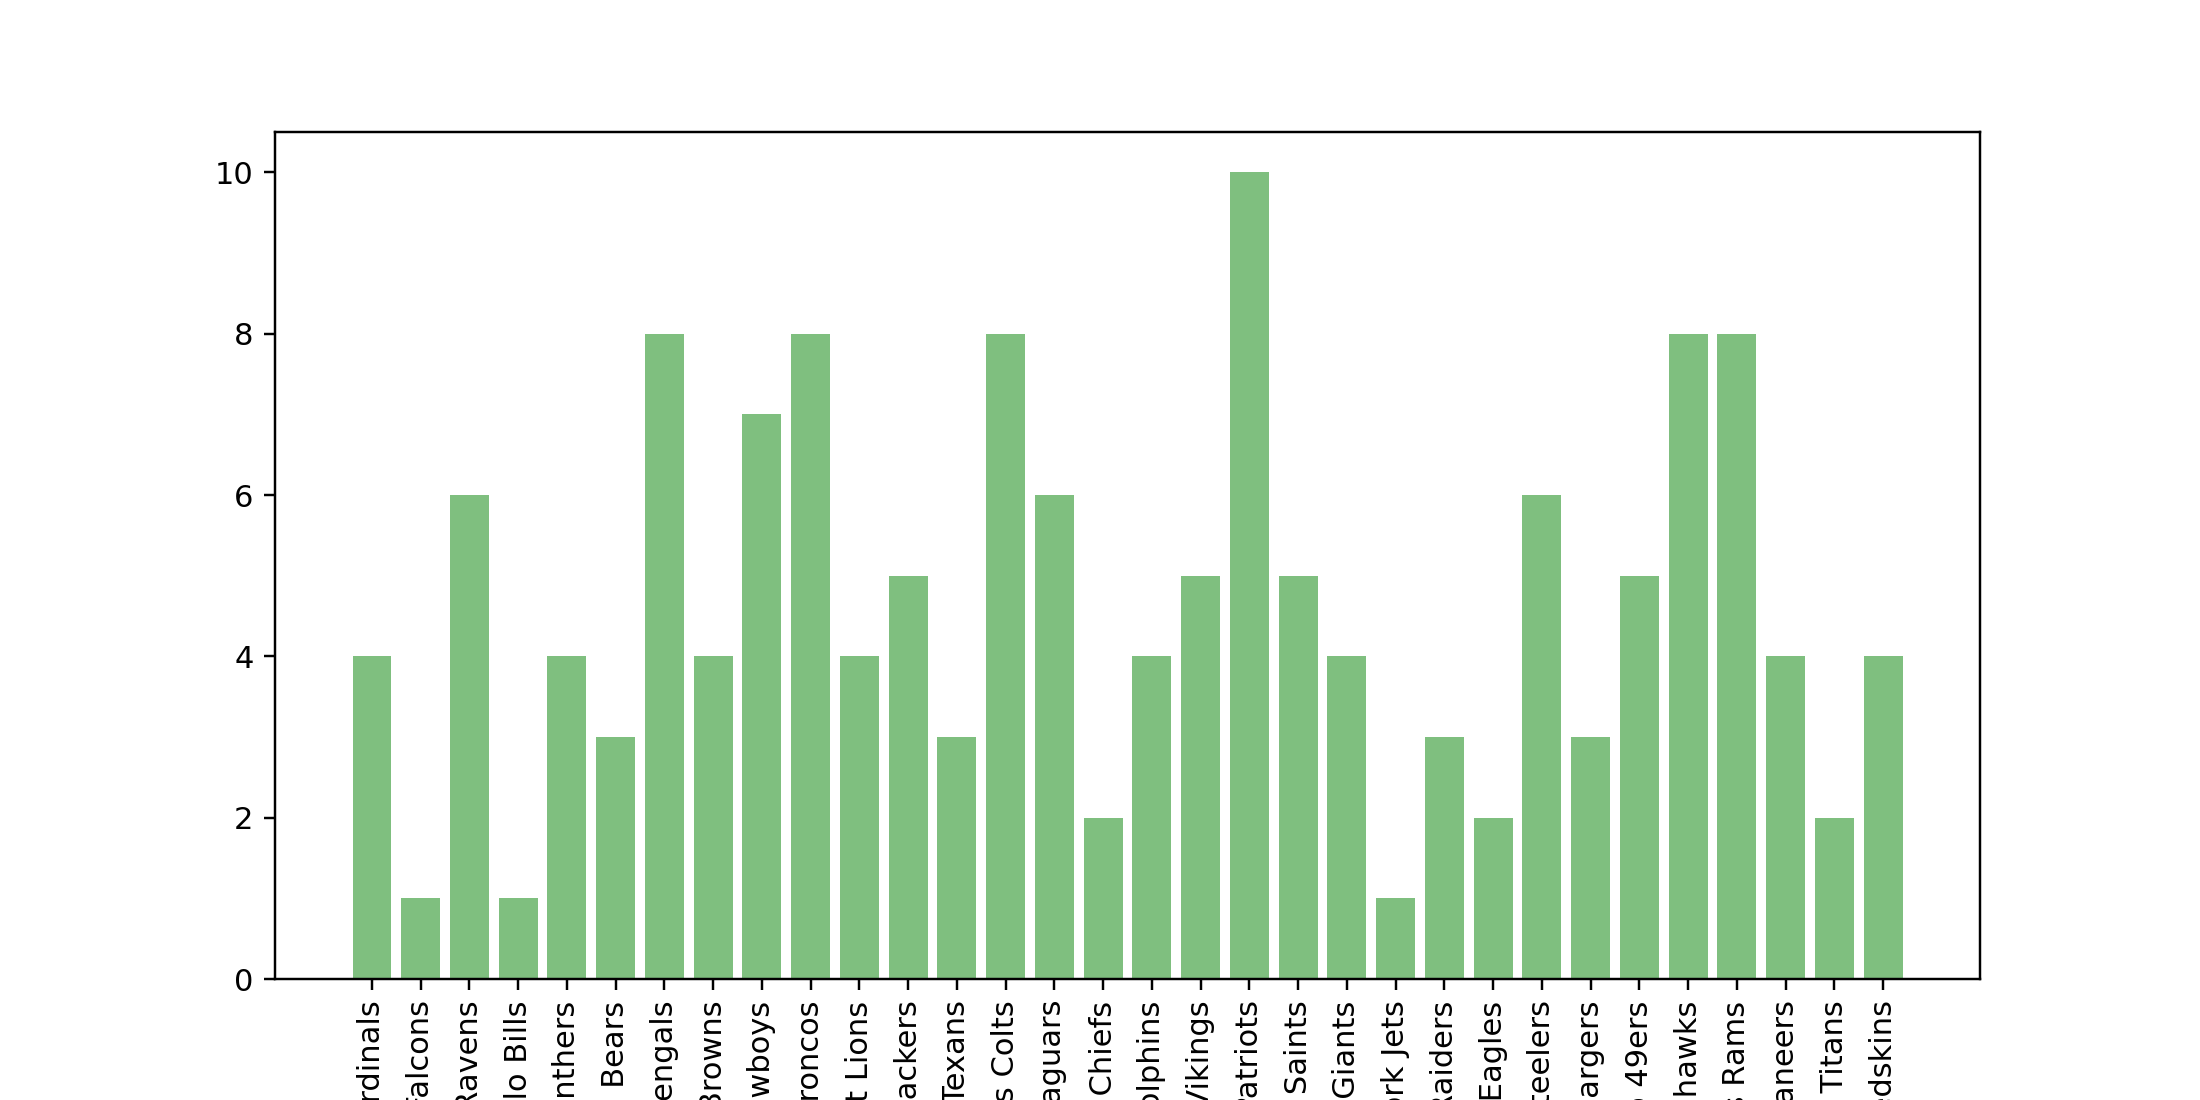

In [45]:
plt.figure(figsize=(10,5))
plt.bar(wining_teams["Wining Teams"], wining_teams["Number of Wins"], color='g', alpha=0.5, align="center")
plt.xticks(rotation="vertical")
plt.show()

In [46]:
losing_teams = team_success_concussion.loc[team_success_concussion["Winning Team?"] == "No"]
losing_teams.head()

,Team,Date,Opposing Team,Winning Team?
1,San Diego Chargers,22/09/2013,Tennessee Titans,No
2,Buffalo Bills,28/09/2014,Houston Texans,No
18,Chicago Bears,11/11/2012,Houston Texans,No
20,Green Bay Packers,24/11/2013,Minnesota Vikings,No
23,New York Jets,29/09/2013,Tennessee Titans,No


In [47]:
losing_teams = team_success_concussion.groupby(["Team"]).apply(lambda x: x[x["Winning Team?"] == "No"]["Winning Team?"].count())

In [48]:
losing_teams = pd.DataFrame(losing_teams)
losing_teams = losing_teams.reset_index()
losing_teams = losing_teams.rename(columns = {"Team":"Losing Teams", 0:"Number of Lose"})
losing_teams.head()

,Losing Teams,Number of Lose
0,Arizona Cardinals,4
1,Atlanta Falcons,4
2,Baltimore Ravens,5
3,Buffalo Bills,4
4,Carolina Panthers,2


<IPython.core.display.Javascript object>


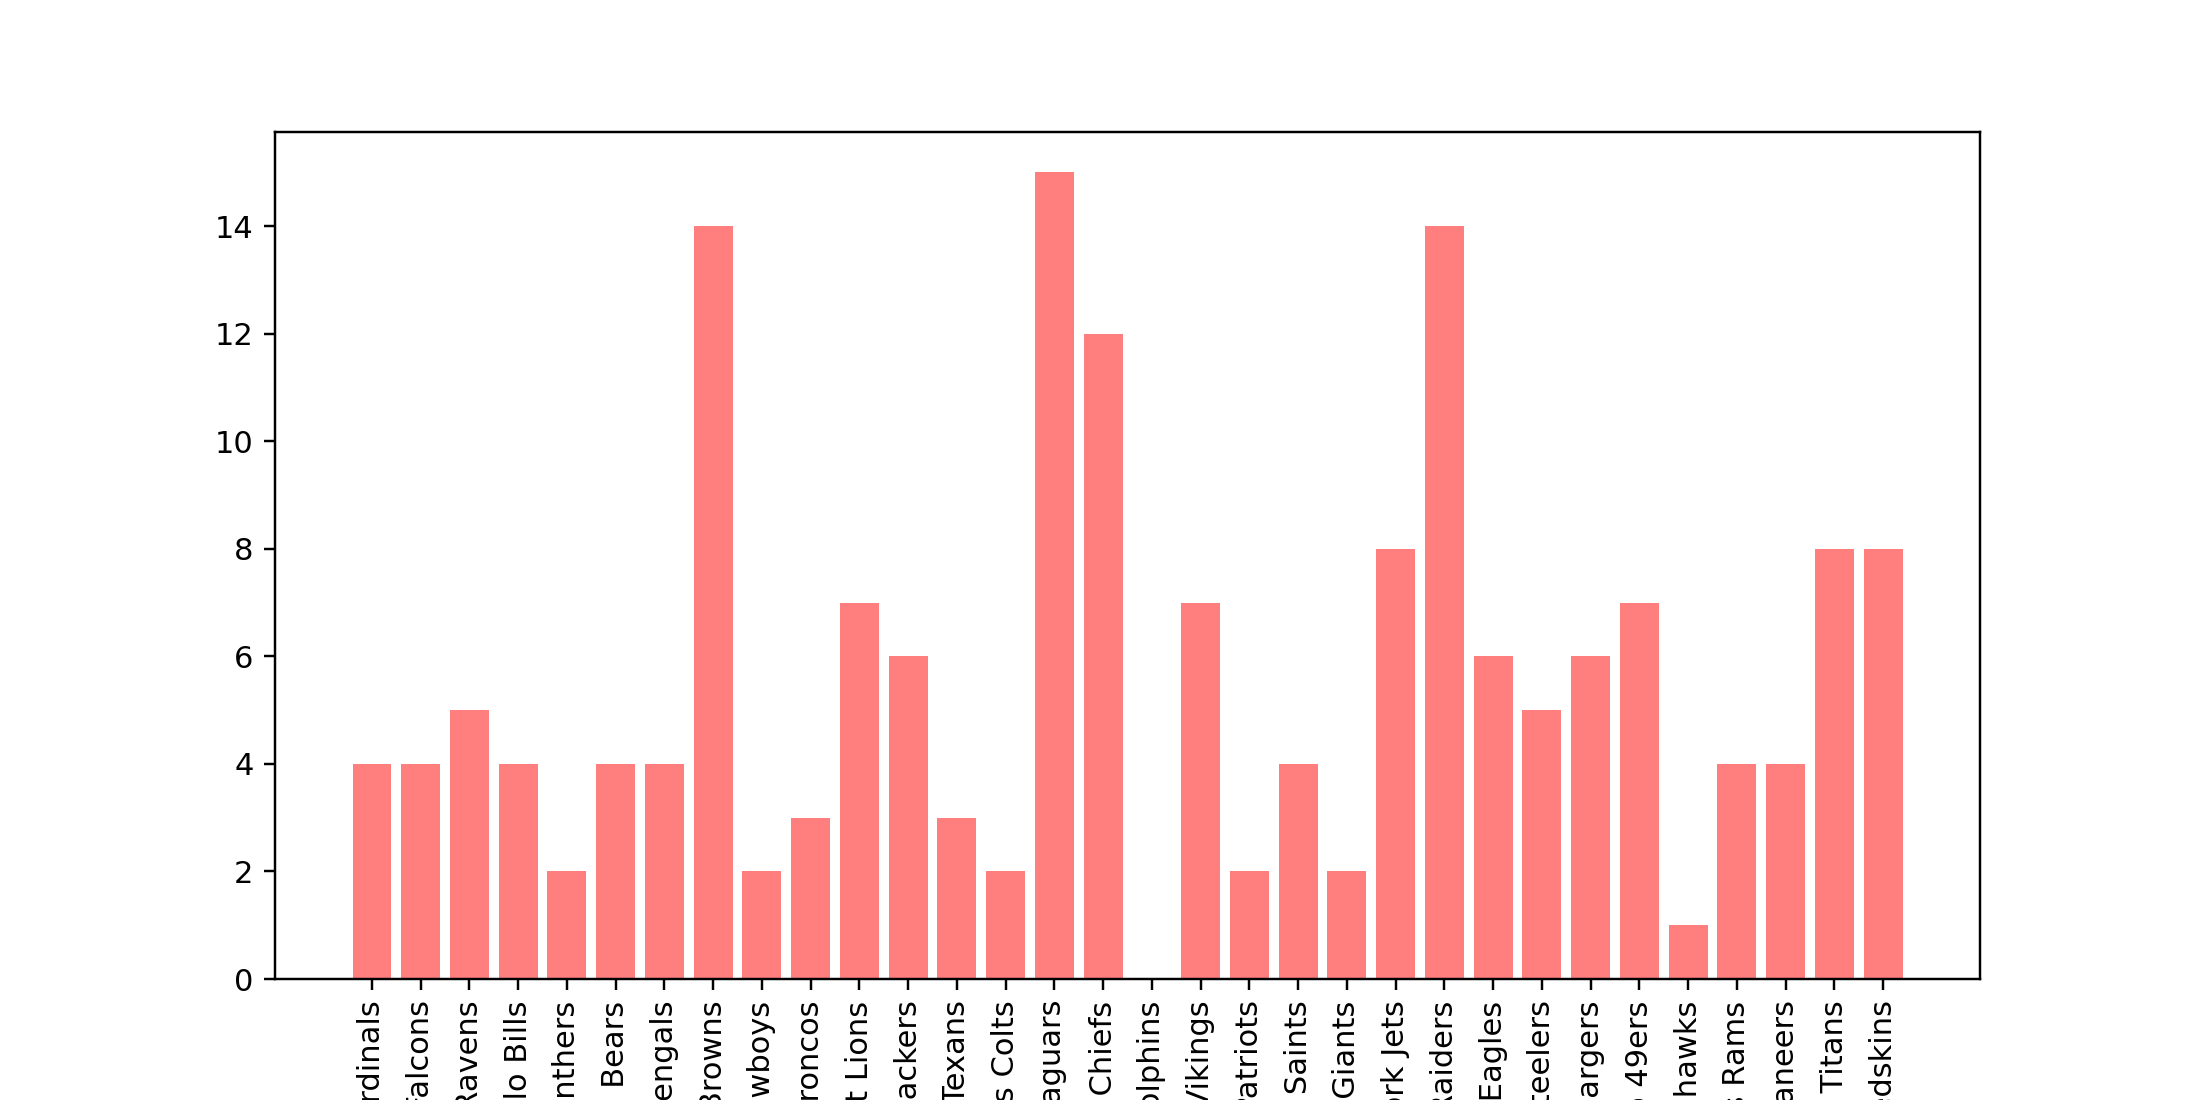

In [49]:
plt.figure(figsize=(10,5))
plt.bar(losing_teams["Losing Teams"], losing_teams["Number of Lose"], color='r', alpha=0.5, align="center")
plt.xticks(rotation="vertical")
plt.show()

In [50]:
wining_teams = wining_teams.rename(columns={"Wining Teams":"Teams"})
losing_teams = losing_teams.rename(columns={"Losing Teams":"Teams"})

In [51]:
wining_teams.head()

,Teams,Number of Wins
0,Arizona Cardinals,4
1,Atlanta Falcons,1
2,Baltimore Ravens,6
3,Buffalo Bills,1
4,Carolina Panthers,4


In [52]:
losing_teams.head()

,Teams,Number of Lose
0,Arizona Cardinals,4
1,Atlanta Falcons,4
2,Baltimore Ravens,5
3,Buffalo Bills,4
4,Carolina Panthers,2


In [53]:
compare_wins_loses = wining_teams.merge(losing_teams, left_on='Teams', right_on='Teams',
          suffixes=('Number of Wins', 'Number of Lose'))
compare_wins_loses.head()

,Teams,Number of Wins,Number of Lose
0,Arizona Cardinals,4,4
1,Atlanta Falcons,1,4
2,Baltimore Ravens,6,5
3,Buffalo Bills,1,4
4,Carolina Panthers,4,2


<IPython.core.display.Javascript object>


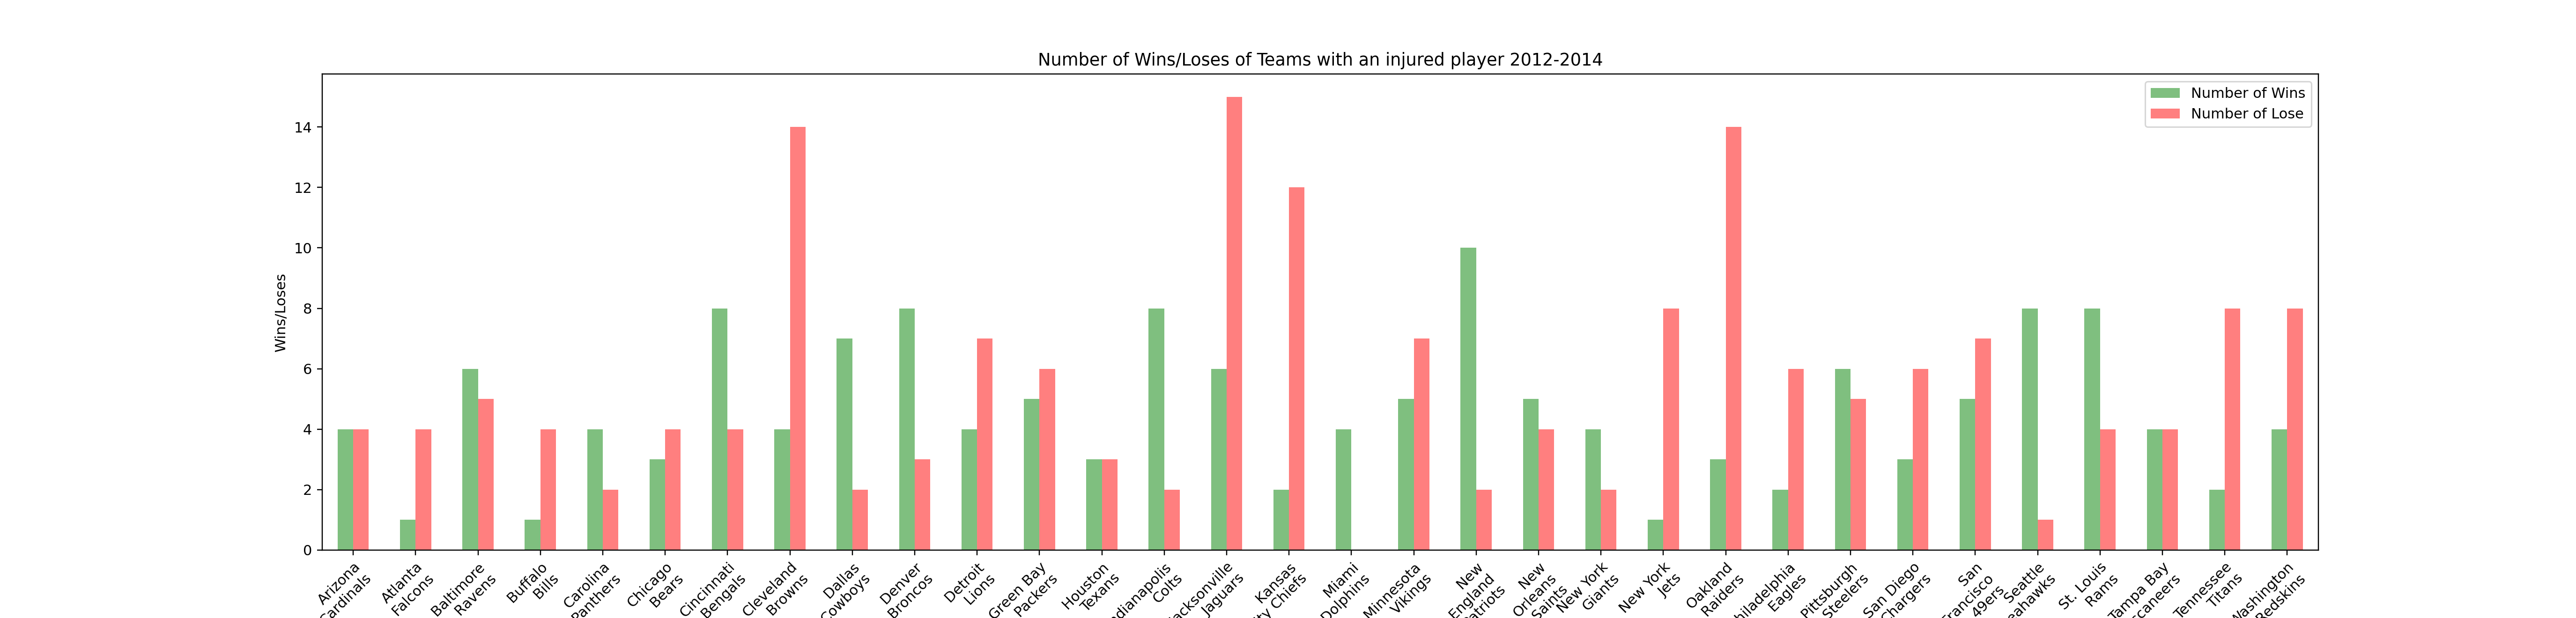

In [108]:
compare_wins_loses_bar = compare_wins_loses.plot(kind="bar", color=["g", "r"], alpha=0.5, figsize=(25,6),
                                   title="Number of Wins/Loses of Teams with an injured player 2012-2014",
                                   xlabel="Teams",
                                   ylabel="Wins/Loses")

# Configure x-tick rotation
xticklabels = compare_wins_loses['Teams']
compare_wins_loses_bar.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

# Show plot
plt.show()

In [55]:
team_list = list(team_success_concussion["Team"].unique())
team_list.sort()
team_list

['Arizona Cardinals',
 'Atlanta Falcons',
 'Baltimore Ravens',
 'Buffalo Bills',
 'Carolina Panthers',
 'Chicago Bears',
 'Cincinnati Bengals',
 'Cleveland Browns',
 'Dallas Cowboys',
 'Denver Broncos',
 'Detroit Lions',
 'Green Bay Packers',
 'Houston Texans',
 'Indianapolis Colts',
 'Jacksonville Jaguars',
 'Kansas City Chiefs',
 'Miami Dolphins',
 'Minnesota Vikings',
 'New England Patriots',
 'New Orleans Saints',
 'New York Giants',
 'New York Jets',
 'Oakland Raiders',
 'Philadelphia Eagles',
 'Pittsburgh Steelers',
 'San Diego Chargers',
 'San Francisco 49ers',
 'Seattle Seahawks',
 'St. Louis Rams',
 'Tampa Bay Buccaneers',
 'Tennessee Titans',
 'Washington Redskins']

In [56]:
win_count = (team_success_concussion['Winning Team?'].value_counts()['Yes'])
win_count

148

In [57]:
win_count = team_success_concussion['Winning Team?'].value_counts("Yes")
win_count

No     0.544615
Yes    0.455385
Name: Winning Team?, dtype: float64

<IPython.core.display.Javascript object>


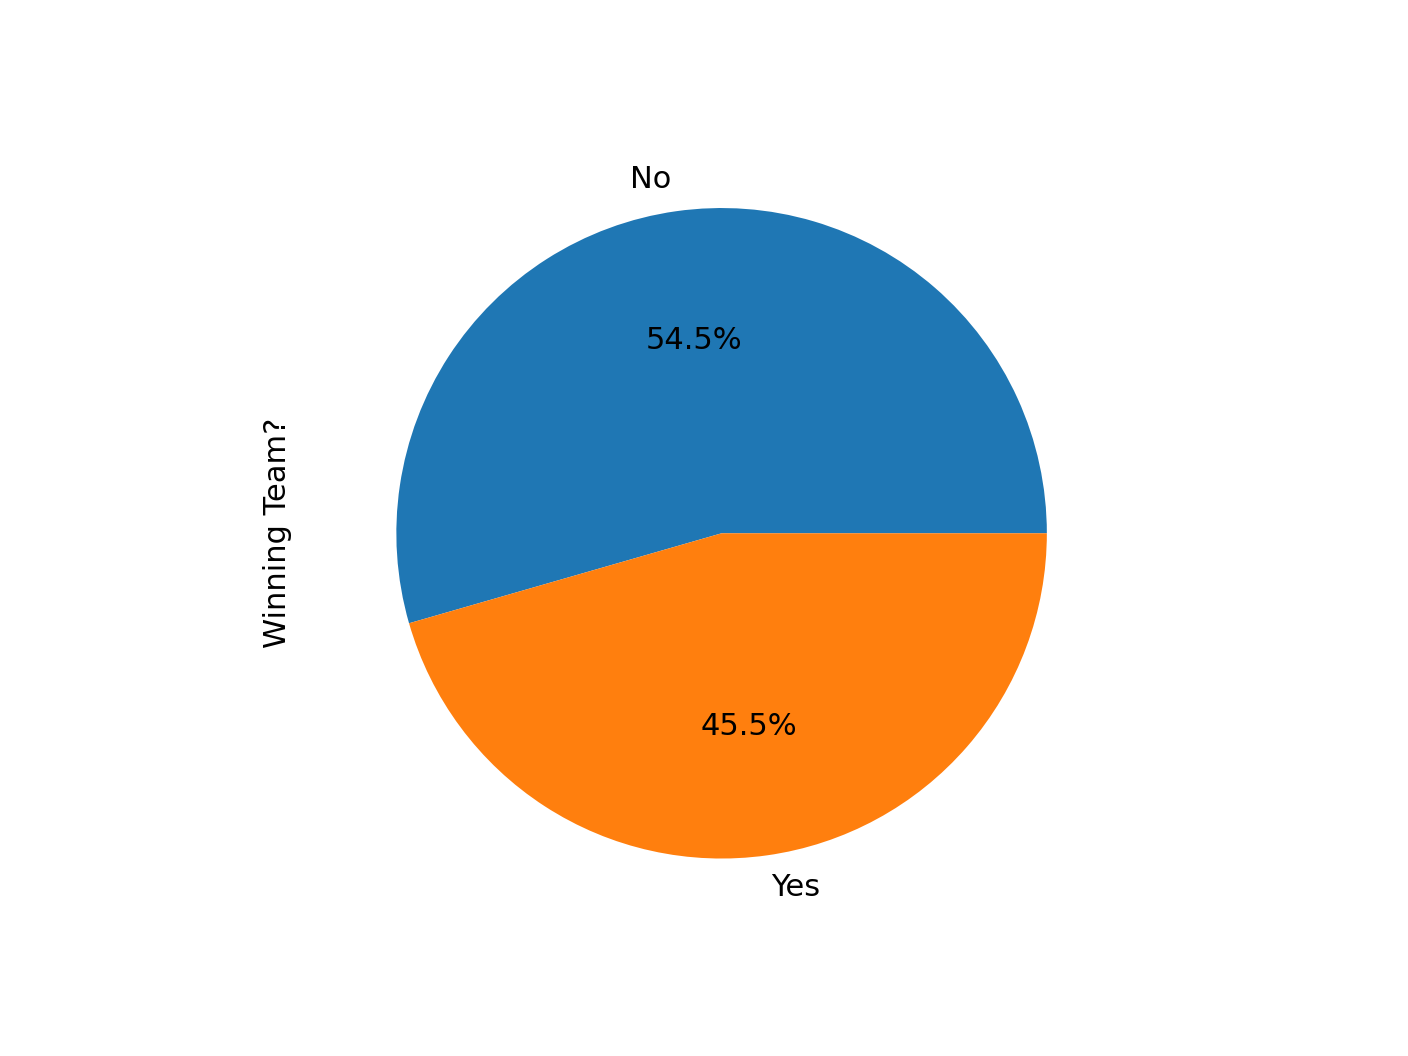

In [58]:
win_count = team_success_concussion['Winning Team?'].value_counts()
win_count.plot.pie(autopct = "%1.1f%%")
plt.show()

<IPython.core.display.Javascript object>


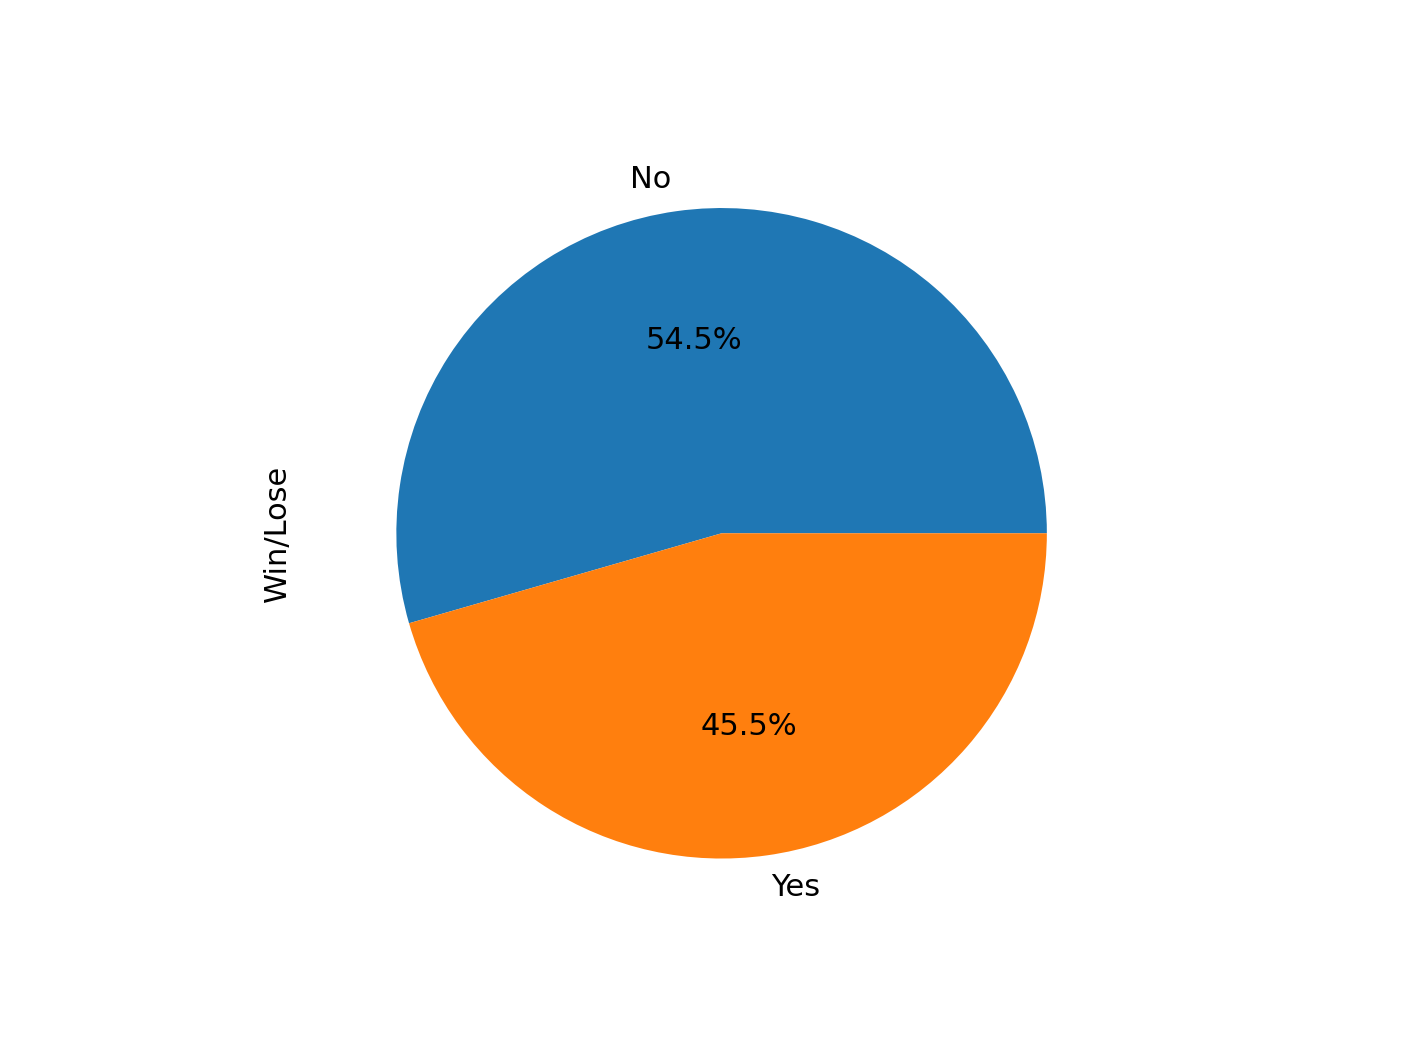

In [59]:
labels = ['Lose', 'Win']
sizes = [50.6, 49.4]
plot = win_count.plot.pie(y = 'Total Count', autopct = "%1.1f%%")
plt.ylabel('Win/Lose')
plt.show()

# Concussion_inflicting_teams

In [62]:
team_success_concussion

,Team,Date,Opposing Team,Winning Team?
0,Washington Redskins,30/09/2012,Tampa Bay Buccaneers,Yes
1,San Diego Chargers,22/09/2013,Tennessee Titans,No
2,Buffalo Bills,28/09/2014,Houston Texans,No
3,New England Patriots,12/10/2014,Buffalo Bills,Yes
16,San Francisco 49ers,29/10/2012,Arizona Cardinals,Yes
...,...,...,...,...
387,San Diego Chargers,25/11/2012,Baltimore Ravens,No
388,Tennessee Titans,28/09/2014,Indianapolis Colts,No
389,Green Bay Packers,23/12/2012,Tennessee Titans,Yes
390,New England Patriots,8/12/2013,Cleveland Browns,Yes


In [64]:
concussion_inflicting_teams = pd.DataFrame(team_success_concussion)
concussion_inflicting_teams = team_success_concussion.reset_index()
concussion_inflicting_teams = team_success_concussion.rename(columns = {"Team", "Number of Wins/Loss"})
concussion_inflicting_teams.head()

TypeError: 'set' object is not callable

In [65]:
concussion_inflicting_teams = clean_concussion_2012_2014.loc[:,['Opposing Team', 'Winning Team?',]]
concussion_inflicting_teams

,Opposing Team,Winning Team?
0,Tampa Bay Buccaneers,Yes
1,Tennessee Titans,No
2,Houston Texans,No
3,Buffalo Bills,Yes
16,Arizona Cardinals,Yes
...,...,...
387,Baltimore Ravens,No
388,Indianapolis Colts,No
389,Tennessee Titans,Yes
390,Cleveland Browns,Yes


In [147]:
concussion_inflicting_teams['Winning Team?'] = concussion_inflicting_teams['Winning Team?'].replace(
    {
        'Yes': 'No',
        'No': 'Yes'}
)

In [148]:
concussion_inflicting_teams

,Opposing Team,Winning Team?
0,Tampa Bay Buccaneers,No
1,Tennessee Titans,Yes
2,Houston Texans,Yes
3,Buffalo Bills,No
16,Arizona Cardinals,No
...,...,...
387,Baltimore Ravens,Yes
388,Indianapolis Colts,Yes
389,Tennessee Titans,No
390,Cleveland Browns,No


In [149]:
concussion_inflicting_teams_df = concussion_inflicting_teams.groupby(["Opposing Team"]).apply(lambda x: x["Winning Team?"].count())


In [150]:
concussion_inflicting_teams_df = concussion_inflicting_teams.groupby(["Opposing Team"]).apply(lambda x: x[x["Winning Team?"] == "Yes"]["Winning Team?"].count())



In [151]:
concussion_inflicting_teams_df = pd.DataFrame(concussion_inflicting_teams_df)
concussion_inflicting_teams_df = concussion_inflicting_teams_df.reset_index()
concussion_inflicting_teams_df = concussion_inflicting_teams_df.rename(columns = {"Opposing Team":"Concussion inflicting Teams", 0:"Wins"})
concussion_inflicting_teams_df.head()

,Concussion inflicting Teams,Wins
0,Arizona Cardinals,2
1,Atlanta Falcons,3
2,Baltimore Ravens,7
3,Buffalo Bills,6
4,Carolina Panthers,5


<IPython.core.display.Javascript object>


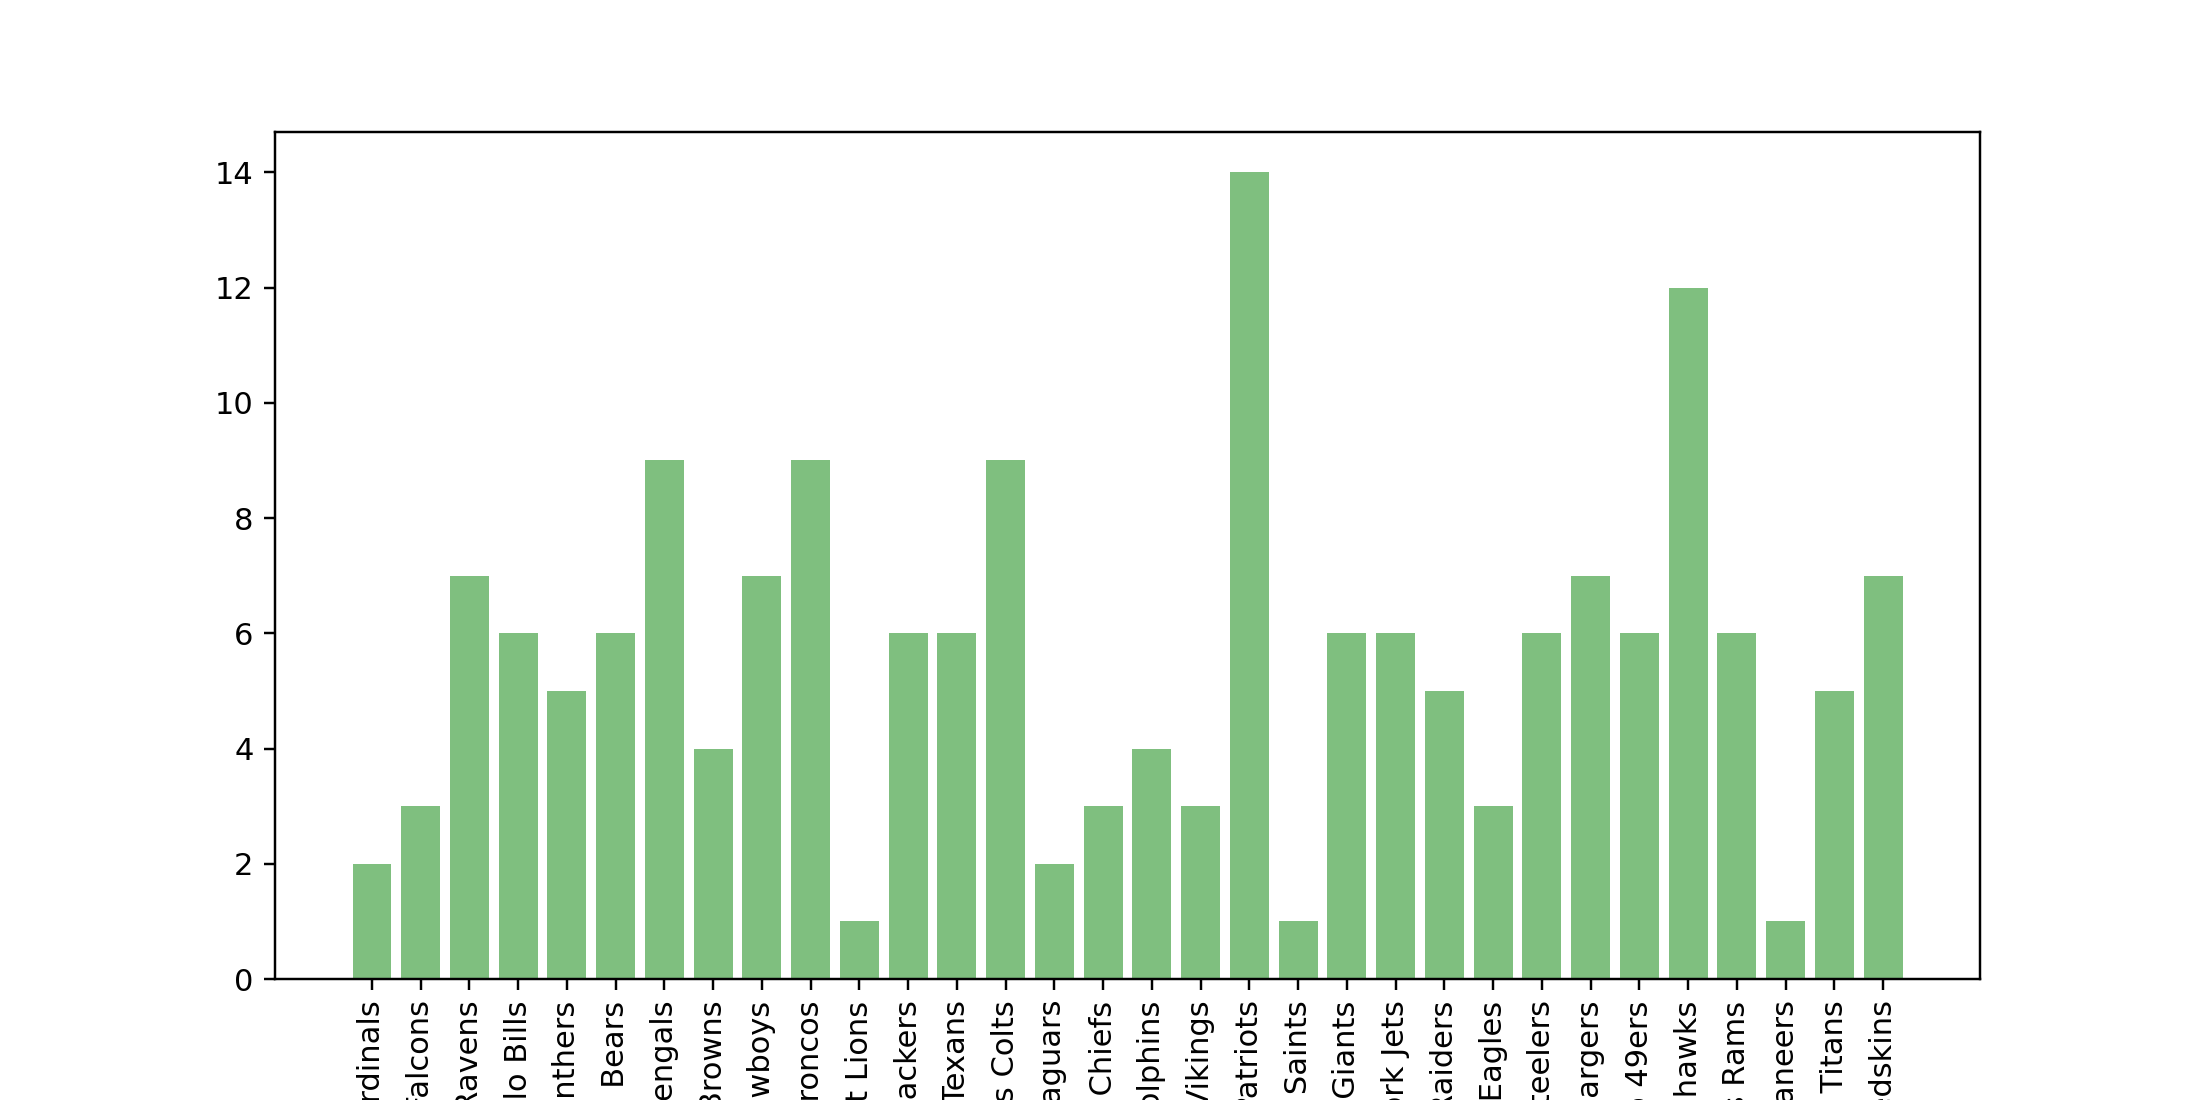

In [152]:
plt.figure(figsize=(10,5))
plt.bar(concussion_inflicting_teams_df["Concussion inflicting Teams"], concussion_inflicting_teams_df["Wins"], color='g', alpha=0.5, align="center")
plt.xticks(rotation="vertical")
plt.show()

In [153]:
win_count_df = concussion_inflicting_teams['Winning Team?'].value_counts("Yes")
win_count_df

Yes    0.544615
No     0.455385
Name: Winning Team?, dtype: float64

In [154]:
losing_teams_df = concussion_inflicting_teams.loc[concussion_inflicting_teams["Winning Team?"] == "No"]
losing_teams_df.head()

,Opposing Team,Winning Team?
0,Tampa Bay Buccaneers,No
3,Buffalo Bills,No
16,Arizona Cardinals,No
17,Pittsburgh Steelers,No
19,Tampa Bay Buccaneers,No


In [155]:
losing_teams_df = concussion_inflicting_teams.groupby(["Opposing Team"]).apply(lambda x: x[x["Winning Team?"] == "No"]["Winning Team?"].count())


In [156]:
losing_teams_df = pd.DataFrame(losing_teams_df)
losing_teams_df = losing_teams_df.reset_index()
losing_teams_df = losing_teams_df.rename(columns = {"Team":"Losing Teams", 0:"Lose"})
losing_teams_df.head()

,Opposing Team,Lose
0,Arizona Cardinals,4
1,Atlanta Falcons,2
2,Baltimore Ravens,4
3,Buffalo Bills,9
4,Carolina Panthers,2


<IPython.core.display.Javascript object>


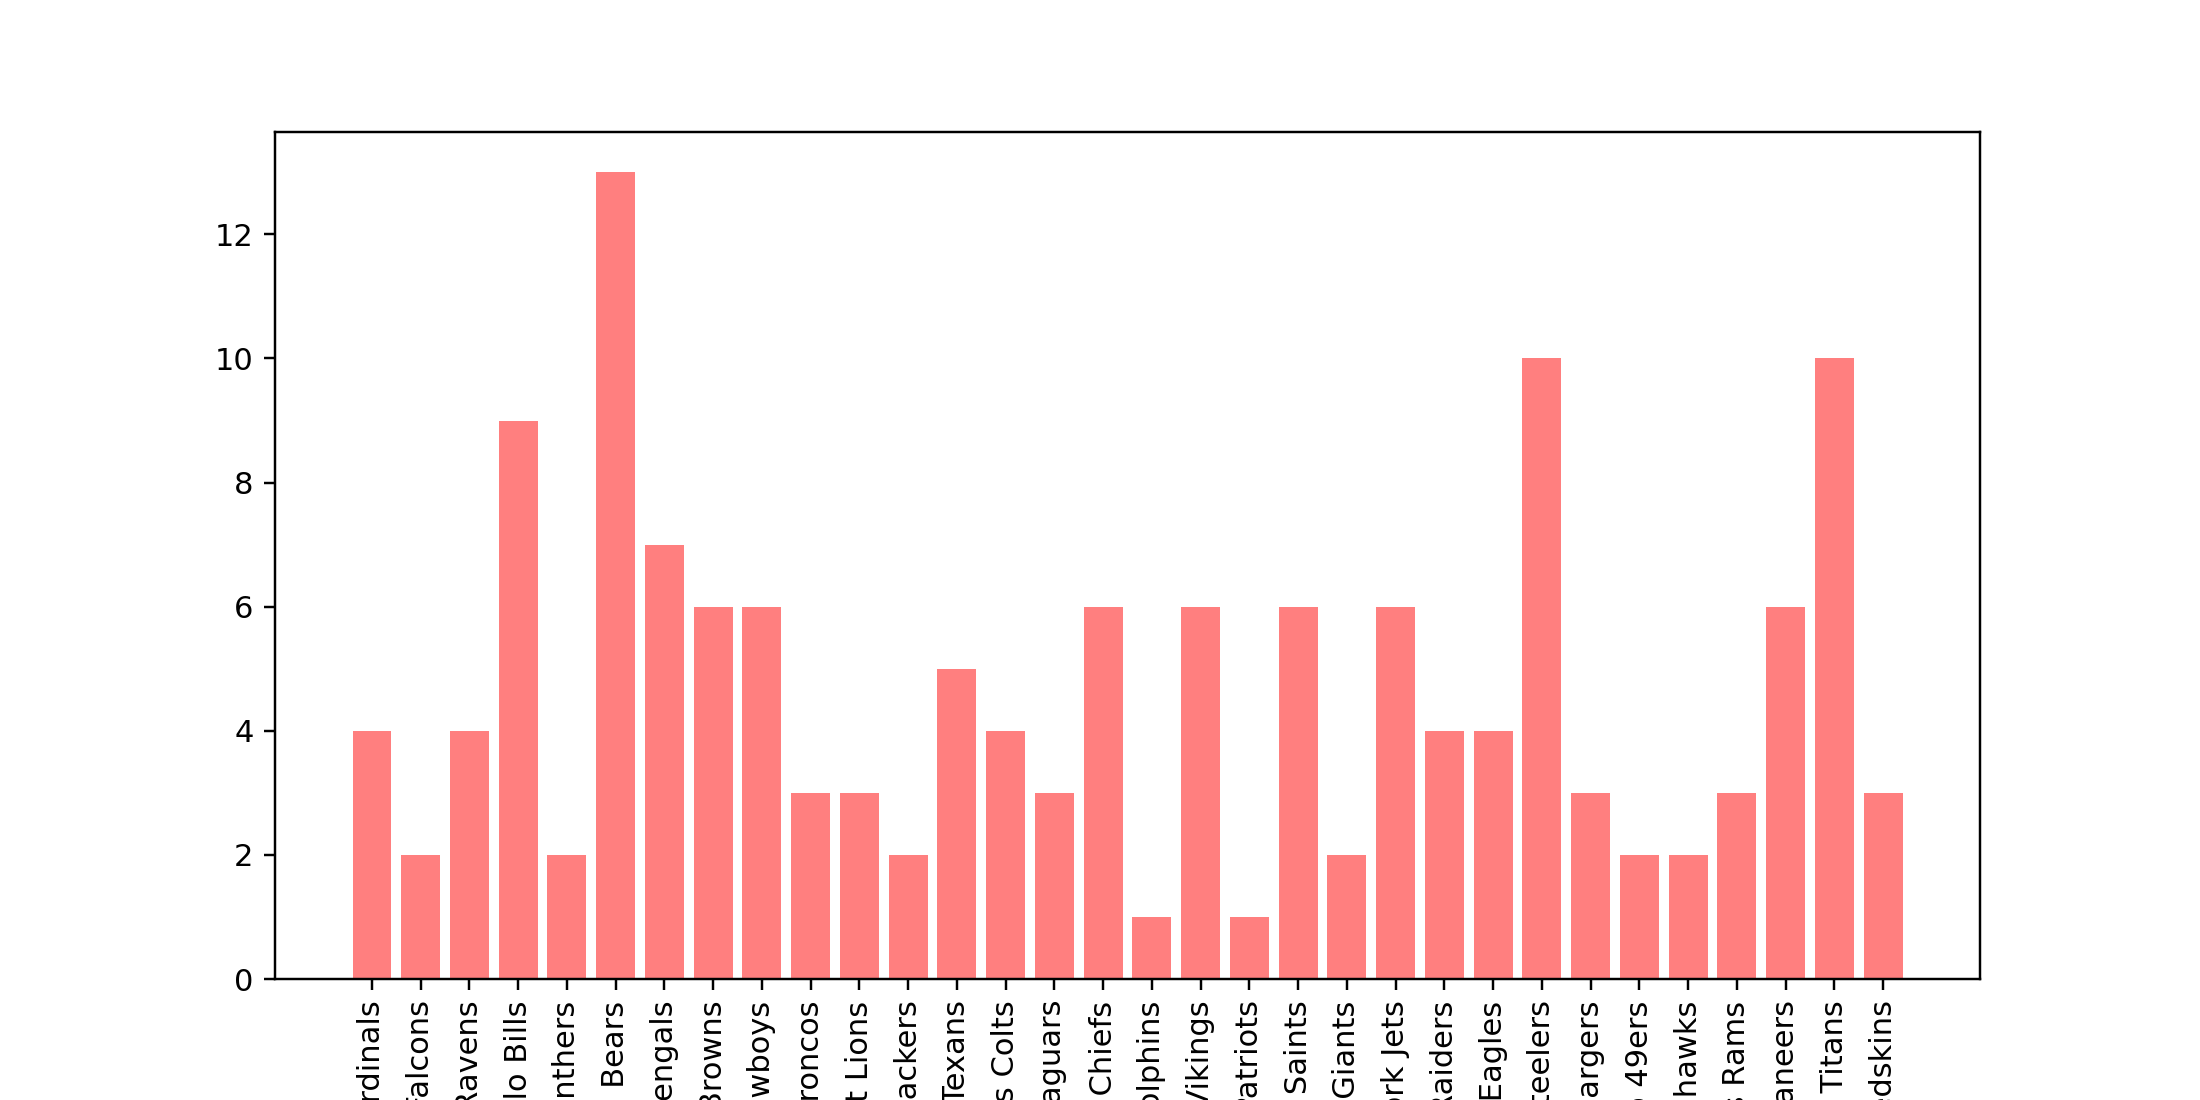

In [157]:
plt.figure(figsize=(10,5))
plt.bar(losing_teams_df["Opposing Team"], losing_teams_df["Lose"], color='r', alpha=0.5, align="center")
plt.xticks(rotation="vertical")
plt.show()

In [158]:
concussion_inflicting_teams_df = concussion_inflicting_teams_df.rename(columns={"Concussion inflicting Teams":"Concussion inflicting Teams"})
losing_teams_df = losing_teams_df.rename(columns={"Opposing Team":"Concussion inflicting Teams"})

In [159]:
compare_wins_loses_df = concussion_inflicting_teams_df.merge(losing_teams_df, left_on='Concussion inflicting Teams', right_on='Concussion inflicting Teams',
          suffixes=('Number of Wins', 'Number of Lose'))
compare_wins_loses_df.head()

,Concussion inflicting Teams,Wins,Lose
0,Arizona Cardinals,2,4
1,Atlanta Falcons,3,2
2,Baltimore Ravens,7,4
3,Buffalo Bills,6,9
4,Carolina Panthers,5,2


<IPython.core.display.Javascript object>


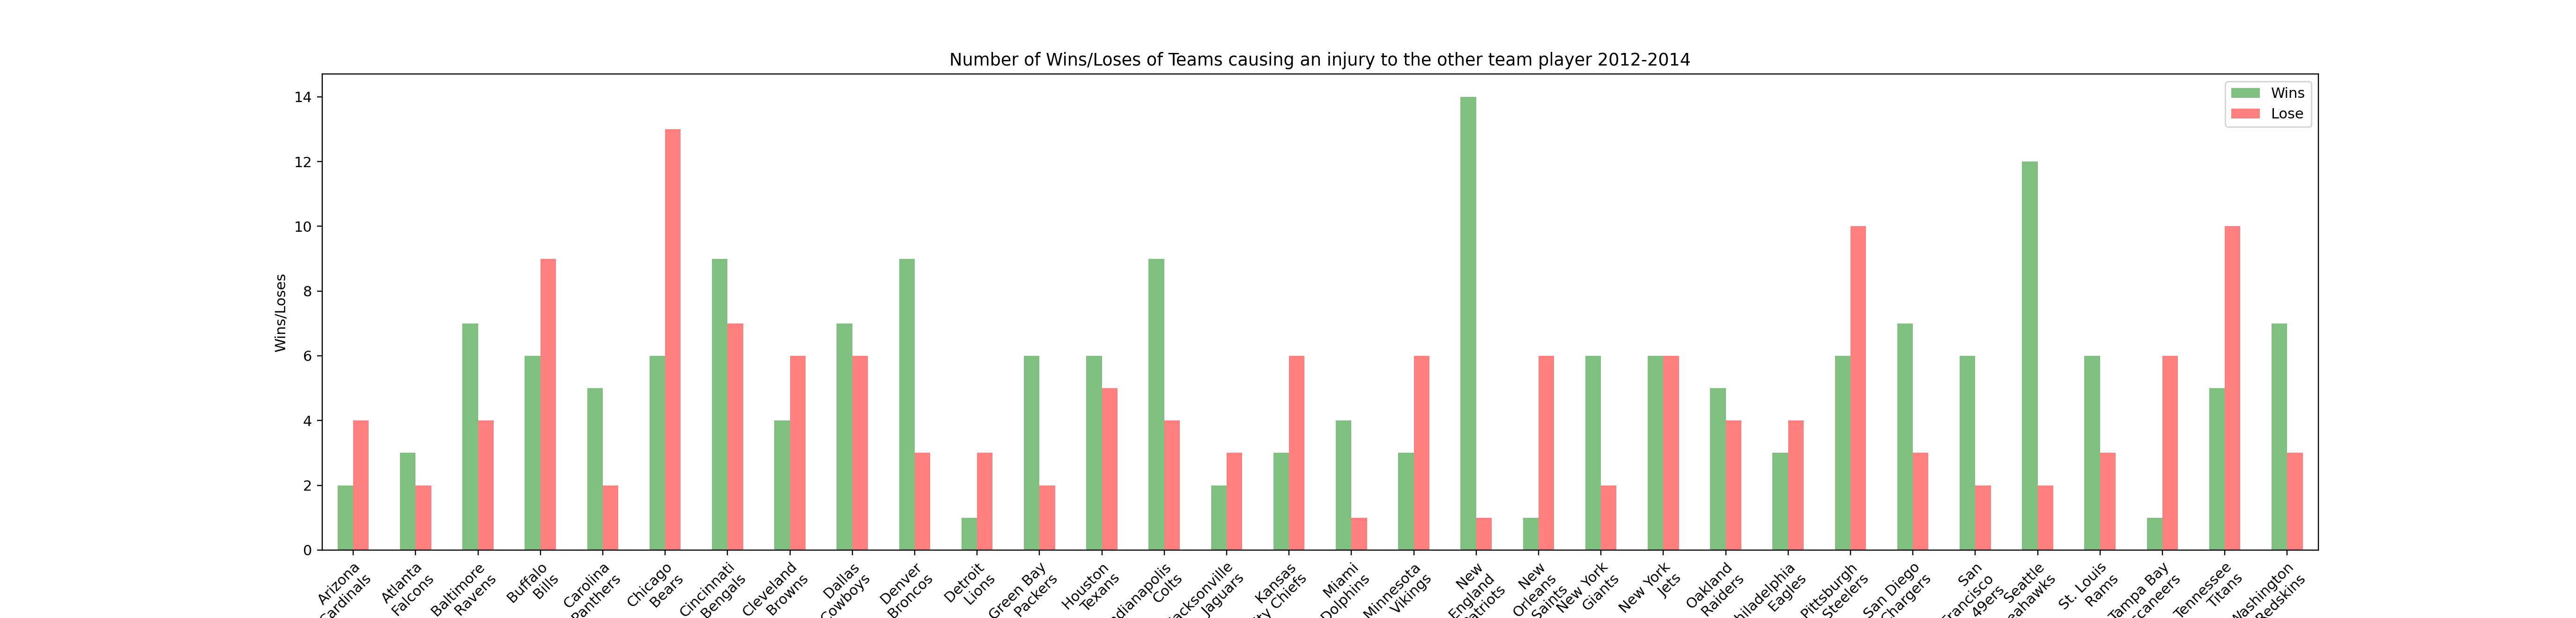

In [162]:
compare_wins_loses_bar_df = compare_wins_loses_df.plot(kind="bar", color=["g", "r"], alpha=0.5, figsize=(25,6),
                                   title="Number of Wins/Loses of Teams causing an injury to the other team player 2012-2014",
                                   xlabel="Concussion inflicting Teams",
                                   ylabel="Wins/Loses")

# Configure x-tick rotation
xticklabels = compare_wins_loses_df['Concussion inflicting Teams']
compare_wins_loses_bar_df.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

# Show plot
plt.show()

In [ ]:
concussion_inflicting_teams

<IPython.core.display.Javascript object>


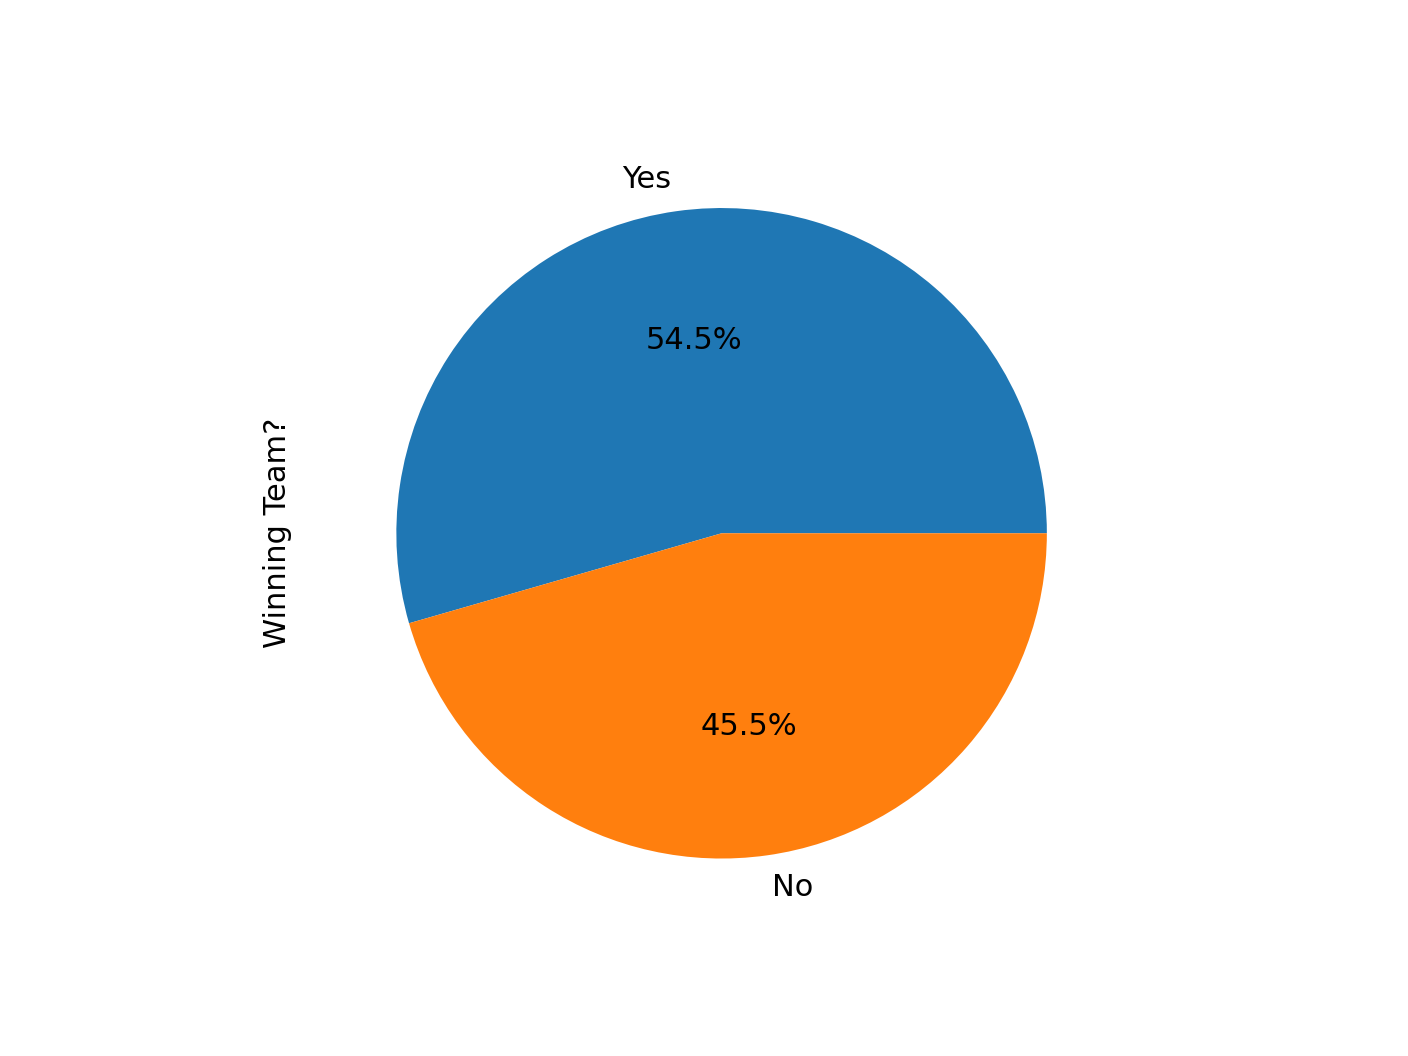

In [161]:
concussion_inflicting_win_count = concussion_inflicting_teams['Winning Team?'].value_counts()
concussion_inflicting_win_count.plot.pie(autopct = "%1.1f%%")
plt.show()